# Analysis of the opioid overdose death in the US

The United States is experiencing an epidemic of drug overdose (poisoning) deaths. Between 1999 and 2014, the crude rate of deaths from drug overdoses has increased 300% (from 3.09 to 10.56) and age-adjusted death rate increased 56% between 2013 to 2019. 

# Project Goal

This project will analyse three dataset from Kaggle: Multiple Cause of Death 1999-2014 v1.1, CDC Injury Center Drug Overdose Deaths and Wide_Master with information on death rates, prescriptions of opioids for treatment of chronic pains and several economic, education and geographic data. I also used a dataset from SAMHSA official site to see availability of  opioid overdose prevention services. 

This analysis is also looking at potential social dispariies in opioid death such as education differences which can be averted to prevent overdose death.

Risks or limitations: A lot of data is missing especially for the beginning of the datasets (1999-2001), some data did not match,like the total was not a sum of death by certain drug which may mean combined drug use. In addition, this notebook inlcudes anlaysis of data from different sources with different measures of opioid overdose death such as crude rate and age-adjusted overdose death rates.  

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
ood=pd.read_csv('../final_proposal_data/Multiple Cause of Death 1999-2014 v1.1.csv')

In [3]:
ood.head()

,State,Year,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Prescriptions Dispensed by US Retailers in that year (millions)
0,Alabama,1999,39,4430141,0.9,0.6,1.2,116
1,Alabama,2000,46,4447100,1,0.8,1.4,126
2,Alabama,2001,67,4467634,1.5,1.2,1.9,138
3,Alabama,2002,75,4480089,1.7,1.3,2.1,142
4,Alabama,2003,54,4503491,1.2,0.9,1.6,149


In [4]:
ood.dtypes

State                                                              object
Year                                                                int64
Deaths                                                             object
Population                                                          int64
Crude Rate                                                         object
Crude Rate Lower 95% Confidence Interval                           object
Crude Rate Upper 95% Confidence Interval                           object
Prescriptions Dispensed by US Retailers in that year (millions)     int64
dtype: object

In [5]:
ood.columns=['State', 'year', 'deaths', 'population', 'crude_rate', 'crate_low', 'crate_up', 'prescriptions']

In [6]:
ood.head()

,State,year,deaths,population,crude_rate,crate_low,crate_up,prescriptions
0,Alabama,1999,39,4430141,0.9,0.6,1.2,116
1,Alabama,2000,46,4447100,1,0.8,1.4,126
2,Alabama,2001,67,4467634,1.5,1.2,1.9,138
3,Alabama,2002,75,4480089,1.7,1.3,2.1,142
4,Alabama,2003,54,4503491,1.2,0.9,1.6,149


In [7]:
ood.shape

(816, 8)

<h4> Data cleaning<h4>

The dataset had "Suppressed" values. In one research, the results were not shown (i.e., suppressed) when issues of confidentiality existed. Suppression rules vary depending on the data source and the indicator. I will try to replace 'Suppressed" with numerical values. This is important since, for some States, it is used in many instances. 

In [8]:
#There are 13 suppressed values for death. I will try to replce them with average between two surrounding years. 
count = (ood['deaths'] == 'Suppressed').sum()
count

13

In [9]:
#Of 13 suppressed values 6 are in Norht Dakota and 3 are in Wyoming and one in each Alaska and Nebraska.
ood[ood['deaths']=='Suppressed']

,State,year,deaths,population,crude_rate,crate_low,crate_up,prescriptions
19,Alaska,2002,Suppressed,642337,Suppressed,Suppressed,Suppressed,142
432,Nebraska,1999,Suppressed,1704764,Suppressed,Suppressed,Suppressed,116
544,North Dakota,1999,Suppressed,644259,Suppressed,Suppressed,Suppressed,116
545,North Dakota,2000,Suppressed,642200,Suppressed,Suppressed,Suppressed,126
546,North Dakota,2001,Suppressed,639062,Suppressed,Suppressed,Suppressed,138
550,North Dakota,2005,Suppressed,646089,Suppressed,Suppressed,Suppressed,163
551,North Dakota,2006,Suppressed,649422,Suppressed,Suppressed,Suppressed,174
557,North Dakota,2012,Suppressed,699628,Suppressed,Suppressed,Suppressed,217
656,South Dakota,1999,Suppressed,750412,Suppressed,Suppressed,Suppressed,116
657,South Dakota,2000,Suppressed,754844,Suppressed,Suppressed,Suppressed,126


In [10]:
ood[ood['State']=='North Dakota']

,State,year,deaths,population,crude_rate,crate_low,crate_up,prescriptions
544,North Dakota,1999,Suppressed,644259,Suppressed,Suppressed,Suppressed,116
545,North Dakota,2000,Suppressed,642200,Suppressed,Suppressed,Suppressed,126
546,North Dakota,2001,Suppressed,639062,Suppressed,Suppressed,Suppressed,138
547,North Dakota,2002,14,638168,2.2,1.2,3.7,142
548,North Dakota,2003,10,638817,1.6,0.8,2.9,149
549,North Dakota,2004,13,644705,2,1.1,3.4,155
550,North Dakota,2005,Suppressed,646089,Suppressed,Suppressed,Suppressed,163
551,North Dakota,2006,Suppressed,649422,Suppressed,Suppressed,Suppressed,174
552,North Dakota,2007,17,652822,2.6,1.5,4.2,184
553,North Dakota,2008,32,657569,4.9,3.3,6.9,196


In [11]:
#replacing "Suppressed" with NAN to replace NAN later
ood.replace("Suppressed", np.nan, inplace=True)

In [12]:
#Chaging datatype to numerical
ood["deaths"] = ood.deaths.astype(float)
ood['crude_rate']=ood.crude_rate.astype(float)

In [13]:
#Replacing nan death data with the mean of the preceding and following years.
#Using the mean for the whole State seemed too high especially when missing values were for the beginning of the analysis. 
ood['deaths'] = ood.groupby('State')['deaths'].apply(lambda x: x.fillna((x.shift(1) + x.shift(-1))/2))

In [14]:
ood.isna().sum()

State             0
year              0
deaths            9
population        0
crude_rate       13
crate_low        13
crate_up         13
prescriptions     0
dtype: int64

In [15]:
#Replacing nan death data with the following or preceding year for the data that has no presending or following year. 
ood['deaths'] = ood.groupby('State')['deaths'].apply(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

In [16]:
#No nan data in the death column
ood.isna().sum()

State             0
year              0
deaths            0
population        0
crude_rate       13
crate_low        13
crate_up         13
prescriptions     0
dtype: int64

In [17]:
#New data for North Dakota
ood[ood['State']=='North Dakota']

,State,year,deaths,population,crude_rate,crate_low,crate_up,prescriptions
544,North Dakota,1999,14.0,644259,NaN,NaN,NaN,116
545,North Dakota,2000,14.0,642200,NaN,NaN,NaN,126
546,North Dakota,2001,14.0,639062,NaN,NaN,NaN,138
547,North Dakota,2002,14.0,638168,2.2,1.2,3.7,142
548,North Dakota,2003,10.0,638817,1.6,0.8,2.9,149
549,North Dakota,2004,13.0,644705,2.0,1.1,3.4,155
550,North Dakota,2005,13.0,646089,NaN,NaN,NaN,163
551,North Dakota,2006,13.0,649422,NaN,NaN,NaN,174
552,North Dakota,2007,17.0,652822,2.6,1.5,4.2,184
553,North Dakota,2008,32.0,657569,4.9,3.3,6.9,196


In [18]:
#Recalculating the crude rate based on new death data 
ood['crude_rate']=(ood['deaths']/ood['population'])*100000

In [19]:
ood[ood['State']=='North Dakota']

,State,year,deaths,population,crude_rate,crate_low,crate_up,prescriptions
544,North Dakota,1999,14.0,644259,2.173039,NaN,NaN,116
545,North Dakota,2000,14.0,642200,2.180006,NaN,NaN,126
546,North Dakota,2001,14.0,639062,2.190711,NaN,NaN,138
547,North Dakota,2002,14.0,638168,2.193780,1.2,3.7,142
548,North Dakota,2003,10.0,638817,1.565394,0.8,2.9,149
549,North Dakota,2004,13.0,644705,2.016426,1.1,3.4,155
550,North Dakota,2005,13.0,646089,2.012107,NaN,NaN,163
551,North Dakota,2006,13.0,649422,2.001780,NaN,NaN,174
552,North Dakota,2007,17.0,652822,2.604079,1.5,4.2,184
553,North Dakota,2008,32.0,657569,4.866409,3.3,6.9,196


I initially replaced the missing data with State means but, for some states, the missing data was at the beginning of the time period and the means were too high.

#ood_by_state_mean = ood.groupby('state')['crude_rate'].transform('mean')

ood['crude_rate'].fillna(ood_by_state_mean, inplace=True)

In [20]:
ood[ood['crude_rate']=='Suppressed']

,State,year,deaths,population,crude_rate,crate_low,crate_up,prescriptions


In [21]:
ood[ood['State']=='North Dakota']

,State,year,deaths,population,crude_rate,crate_low,crate_up,prescriptions
544,North Dakota,1999,14.0,644259,2.173039,NaN,NaN,116
545,North Dakota,2000,14.0,642200,2.180006,NaN,NaN,126
546,North Dakota,2001,14.0,639062,2.190711,NaN,NaN,138
547,North Dakota,2002,14.0,638168,2.193780,1.2,3.7,142
548,North Dakota,2003,10.0,638817,1.565394,0.8,2.9,149
549,North Dakota,2004,13.0,644705,2.016426,1.1,3.4,155
550,North Dakota,2005,13.0,646089,2.012107,NaN,NaN,163
551,North Dakota,2006,13.0,649422,2.001780,NaN,NaN,174
552,North Dakota,2007,17.0,652822,2.604079,1.5,4.2,184
553,North Dakota,2008,32.0,657569,4.866409,3.3,6.9,196


In [22]:
ood[ood['State']=='Alaska']

,State,year,deaths,population,crude_rate,crate_low,crate_up,prescriptions
16,Alaska,1999,28.0,624779,4.481585,3,6.5,116
17,Alaska,2000,27.0,626932,4.306687,2.8,6.3,126
18,Alaska,2001,17.0,633714,2.682598,1.6,4.3,138
19,Alaska,2002,15.5,642337,2.413064,NaN,NaN,142
20,Alaska,2003,14.0,648414,2.159114,1.2,3.6,149
21,Alaska,2004,11.0,659286,1.668472,0.8,3,155
22,Alaska,2005,19.0,666946,2.848806,1.7,4.4,163
23,Alaska,2006,29.0,675302,4.294375,2.9,6.2,174
24,Alaska,2007,16.0,680300,2.351904,1.3,3.8,184
25,Alaska,2008,94.0,687455,13.673622,11,16.7,196


In [23]:
ood[ood['State']=='Wyoming']

,State,year,deaths,population,crude_rate,crate_low,crate_up,prescriptions
800,Wyoming,1999,10.0,491780,2.033430,NaN,NaN,116
801,Wyoming,2000,10.0,493782,2.025185,1,3.7,126
802,Wyoming,2001,13.5,494657,2.729164,NaN,NaN,138
803,Wyoming,2002,17.0,500017,3.399884,2,5.4,142
804,Wyoming,2003,15.5,503453,3.078738,NaN,NaN,149
805,Wyoming,2004,14.0,509106,2.749918,1.5,4.6,155
806,Wyoming,2005,10.0,514157,1.944931,0.9,3.6,163
807,Wyoming,2006,14.0,522667,2.678570,1.5,4.5,174
808,Wyoming,2007,25.0,534876,4.673981,3,6.9,184
809,Wyoming,2008,48.0,546043,8.790516,6.5,11.7,196


<h4> EDA <h4>

In [24]:
#Looking at max death numbers by year, state and crude rate
ood_max_deaths=ood.groupby('State').deaths.max().reset_index()

In [25]:
ood_max_deaths=ood.groupby('State').agg({'deaths':'sum', 'population':'sum', 'crude_rate':"mean", 'prescriptions':'mean'})

In [26]:
ood_max_deaths.sort_values('crude_rate', ascending=False).head()

,deaths,population,crude_rate,prescriptions
State,,,,
West Virginia,4982.0,29294713,16.918288,174.625
Nevada,5954.0,39506444,14.735365,174.625
New Mexico,4002.0,31425254,12.633652,174.625
Utah,5165.0,41054488,12.327751,174.625
Rhode Island,1847.0,16915600,10.920125,174.625


In [27]:
ood_max_deaths.sort_values('crude_rate', ascending=False).tail()

,deaths,population,crude_rate,prescriptions
State,,,,
Alabama,2173.0,74294552,2.883004,174.625
South Dakota,369.0,12683381,2.870660,174.625
North Dakota,260.0,10637107,2.431082,174.625
Mississippi,1078.0,46703935,2.285610,174.625
Nebraska,622.0,28553385,2.155777,174.625


In [28]:
ood_max_deaths.sort_values('deaths', ascending=False).head()

,deaths,population,crude_rate,prescriptions
State,,,,
California,27044.0,579337229,4.639806,174.625
Florida,19919.0,287386934,6.836099,174.625
New York,16156.0,308127318,5.220171,174.625
Texas,15050.0,378210023,3.918820,174.625
Ohio,13623.0,183650865,7.390517,174.625


The States of California, Florida and New York had the highest overdose death numbers. 

In [29]:
#Looking at max crude rate by year, state and crude rate
ood_max_crude=ood.groupby('State').crude_rate.max().reset_index()

In [30]:
ood_max_crude.merge(
    ood, on=['State', 'crude_rate'], 
    how='inner')[[
    'State', 
    'year', 
    'deaths', 
    'population', 
    'crude_rate']].sort_values(by=['crude_rate'], ascending=False).head()

,State,year,deaths,population,crude_rate
48,West Virginia,2011,596.0,1855364,32.123077
29,New Hampshire,2014,302.0,1326813,22.761308
39,Rhode Island,2014,211.0,1055173,19.996721
31,New Mexico,2014,416.0,2085572,19.946566
28,Nevada,2011,532.0,2723322,19.534965


The State of West Virginia had the highest crude death rate in 2011. In 2014, it was a little lower than in 2011 but it was still the highest in the country. 

In [31]:
ood_wv=ood[ood['State']=='West Virginia']
ood_wv

,State,year,deaths,population,crude_rate,crate_low,crate_up,prescriptions
768,West Virginia,1999,34.0,1811799,1.876588,1.3,2.6,116
769,West Virginia,2000,52.0,1808344,2.875559,2.1,3.8,126
770,West Virginia,2001,150.0,1801481,8.326482,7,9.7,138
771,West Virginia,2002,183.0,1805414,10.136179,8.7,11.6,142
772,West Virginia,2003,203.0,1812295,11.201267,9.7,12.7,149
773,West Virginia,2004,273.0,1816438,15.029415,13.2,16.8,155
774,West Virginia,2005,154.0,1820492,8.459252,7.1,9.8,163
775,West Virginia,2006,299.0,1827912,16.357461,14.5,18.2,174
776,West Virginia,2007,347.0,1834052,18.919856,16.9,20.9,184
777,West Virginia,2008,387.0,1840310,21.029066,18.9,23.1,196


In [32]:
#Using groupby method state to calculate which State had an increase in the crude rates since 1999

ood_by_state=ood.groupby('State').agg({'deaths':'sum', 'population':'sum', 'crude_rate':'mean'})

In [33]:
def compute_diff(state):
    return state['crude_rate'].iloc[-1] - state['crude_rate'].iloc[0]


ood_by_state['crude_rate_15ychange'] = ood.groupby('State').apply(compute_diff)


In [34]:
ood_by_state.sort_values(by=['crude_rate_15ychange'], ascending=False).head()

,deaths,population,crude_rate,crude_rate_15ychange
State,,,,
West Virginia,4982.0,29294713,16.918288,29.739463
New Hampshire,1859.0,20709450,8.893706,19.406191
Ohio,13623.0,183650865,7.390517,17.171501
Rhode Island,1847.0,16915600,10.920125,16.536520
Kentucky,6283.0,67644595,9.132990,15.871667


West Virginia has the highest 15 year increase in opioid overdose crude death rates. 

<h4>Descritive statistics<h4>

Prescription in the table are all the same for all states which probably means that these are national data. I found another data and calculated the share of the opioid prescription by state and will join the two tables only for one year. 

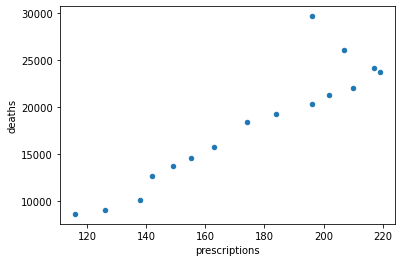

In [35]:
#The scatter plot shows positive correlation between opioid prescriptions and death numbers. 
ood_by_year=ood.groupby(
    'year').agg({
    'deaths':'sum', 
    'population':'sum', 
    'crude_rate':'mean', 
    'prescriptions':'mean'
}).reset_index()

ax=ood_by_year.plot.scatter(x='prescriptions', y='deaths');

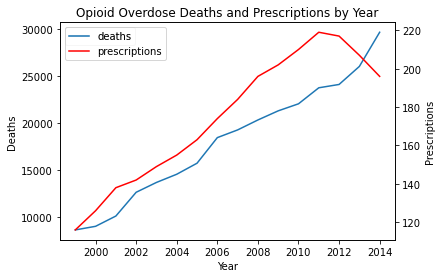

In [36]:
#The graph shows increasing opioid prescriptions and death numbers at similar pace until 2012. 
ax = ood_by_year.plot('year','deaths', label='deaths')
ax1 = ax.twinx()
ood_by_year.plot('year','prescriptions', ax=ax1, color='r')

ax.set_xlabel('Year')
ax.set_ylabel('Deaths')
ax1.set_ylabel('Prescriptions')
plt.title('Opioid Overdose Deaths and Prescriptions by Year')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax1.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left');

Prescriptions drop significantly in 2012 but death numbers continued to grow even more significantly after 2012. 

In [37]:
#There is a strong correlations of death, populaitons and prescription numbers
ood_by_year.corr()

,year,deaths,population,crude_rate,prescriptions
year,1.000000,0.993230,0.999446,0.990530,0.948208
deaths,0.993230,1.000000,0.992979,0.998201,0.925104
population,0.999446,0.992979,1.000000,0.991084,0.955287
crude_rate,0.990530,0.998201,0.991084,1.000000,0.924571
prescriptions,0.948208,0.925104,0.955287,0.924571,1.000000


In [38]:
#Selecting columns for a graph below. 
ood_by_year=ood_by_year[['year', 'population', 'deaths', 'prescriptions']]
ood_by_year

,year,population,deaths,prescriptions
0,1999,279040168,8677.0,116.0
1,2000,281421906,9060.0,126.0
2,2001,284968955,10150.5,138.0
3,2002,287625193,12671.5,142.0
4,2003,290107933,13714.5,149.0
5,2004,292805298,14584.0,155.0
6,2005,295516599,15755.0,163.0
7,2006,298379912,18470.0,174.0
8,2007,301231207,19286.0,184.0
9,2008,304093966,20343.0,196.0


In [39]:
#Nomalizing data for a graph below. Population numbers in millions and deaths numbers in hundreds.
ood_by_year_norm=ood_by_year.copy()

In [40]:
ood_by_year_norm['deaths']=ood_by_year_norm['deaths']/100
ood_by_year_norm['population']=ood_by_year_norm['population']/1000000

In [42]:
ood_by_year_norm

,year,population,deaths,prescriptions
0,1999,279.040168,86.770,116.0
1,2000,281.421906,90.600,126.0
2,2001,284.968955,101.505,138.0
3,2002,287.625193,126.715,142.0
4,2003,290.107933,137.145,149.0
5,2004,292.805298,145.840,155.0
6,2005,295.516599,157.550,163.0
7,2006,298.379912,184.700,174.0
8,2007,301.231207,192.860,184.0
9,2008,304.093966,203.430,196.0


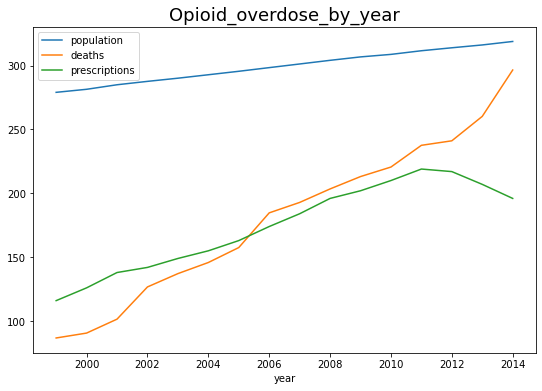

In [42]:
ax=ood_by_year_norm.plot(x='year', figsize=(9, 6))
ax.set_title("Opioid_overdose_by_year", fontsize=18);

This graph above shows that all three variables grew in numbers between 1999 and 2014. Prescriptions dropped in 2012 but death numbers continued to grow even at a bigger scale. It seems that there are other factors that influenced death numbers other than perscription. 

<h4>Adding a new dataframe from CDC<h4>

In [43]:
#The data was giving a coding error, adding encoding to download. 
cdc_data=pd.read_csv('../final_proposal_data/CDC Injury Center Drug Overdose Deaths.csv', encoding= 'unicode_escape', index_col=0).reset_index()
cdc_data.head()

,State,State Abbreviation,"2019 Age-adjusted Rate (per 100,000 population)",2019 Number of Deaths,"2018 Age-adjusted Rate (per 100,000 population)",2018 Number of Deaths,"2017 Age-adjusted Rate (per 100,000 population)",2017 Number of Deaths,"2016 Age-adjusted Rate (per 100,000 population)",2016 Number of Deaths,...,"2013 Age-adjusted Rate (per 100,000 population)",2013 Number of Deaths,2019 Poverty rate (percent of persons in poverty),Gini coefficient of income inequality,GDP per capita 2021,GDP (nominal in millions of USD) 2021,Urban population as a percentage of the total population in 2010,Population density per km²,Population,Land Area (km²)
0,Alabama,AL,16.3,768,16.6,775,18.0,835.0,16.2,756.0,...,12.7,598,15.5,0.4847,48475,243555,59.0,37.043399,4858979,131169.9
1,Alaska,AK,17.8,132,14.6,110,20.2,147.0,16.8,128.0,...,14.4,105,10.1,0.4081,69336,54020,66.0,0.499631,738432,1477953.4
2,Arizona,AZ,26.8,1907,23.8,1670,22.2,1532.0,20.3,1382.0,...,18.7,1222,13.5,0.4713,55954,400156,89.8,23.208362,6828065,294207.1
3,Arkansas,AR,13.5,388,15.7,444,15.5,446.0,14.0,401.0,...,11.1,319,16.2,0.4719,47629,143438,56.2,22.098420,2978204,134770.0
4,California,CA,15.0,6198,12.8,5348,11.7,4868.0,11.2,4654.0,...,11.1,4452,11.8,0.4899,83213,3290170,95.0,96.909425,39144818,403932.0


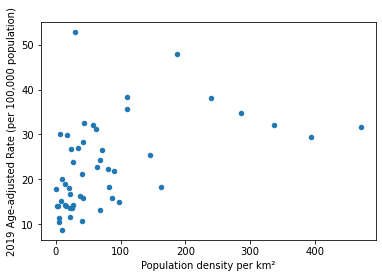

In [44]:
#Looking at one of the features in the table and its correlations with death rate. DC was an outlier for this feature. 
ax=cdc_data[cdc_data['State']!='District of Columbia'].plot.scatter(x='Population density per km²', y='2019 Age-adjusted Rate (per 100,000 population)');

In [46]:
#dropping economic data and the deaths numbers and keeping only rates for now.
cdc_data_rates = cdc_data.drop([
    'State Abbreviation',
    '2019 Number of Deaths',
    '2018 Number of Deaths', 
    '2017 Number of Deaths',
    '2016 Number of Deaths',
    '2015 Number of Deaths',
    '2014 Number of Deaths', 
    '2013 Number of Deaths',
    '2019 Poverty rate (percent of persons in poverty)',
    'Gini coefficient of income inequality',
    'GDP per capita 2021', 
    'GDP (nominal in millions of USD) 2021',
    'Urban population as a percentage of the total population in 2010', 
    'Population density per km²',
    'Population',
    'Land Area (km²)'],axis=1
)

In [47]:
cdc_data_rates.head()

,State,"2019 Age-adjusted Rate (per 100,000 population)","2018 Age-adjusted Rate (per 100,000 population)","2017 Age-adjusted Rate (per 100,000 population)","2016 Age-adjusted Rate (per 100,000 population)","2015 Age-adjusted Rate (per 100,000 population)","2014 Age-adjusted Rate (per 100,000 population)","2013 Age-adjusted Rate (per 100,000 population)"
0,Alabama,16.3,16.6,18.0,16.2,15.7,15.2,12.7
1,Alaska,17.8,14.6,20.2,16.8,16.0,16.8,14.4
2,Arizona,26.8,23.8,22.2,20.3,19.0,18.2,18.7
3,Arkansas,13.5,15.7,15.5,14.0,13.8,12.6,11.1
4,California,15.0,12.8,11.7,11.2,11.3,11.1,11.1


In [48]:
#Adding a column to calculate the change for the period in this data set
cdc_data_rates[
    'rate_change_6y']=cdc_data_rates[
    '2019 Age-adjusted Rate (per 100,000 population)']-cdc_data_rates[
    '2013 Age-adjusted Rate (per 100,000 population)']

In [49]:
cdc_data_rates.sort_values(by=['rate_change_6y'], ascending=False).head(10)

,State,"2019 Age-adjusted Rate (per 100,000 population)","2018 Age-adjusted Rate (per 100,000 population)","2017 Age-adjusted Rate (per 100,000 population)","2016 Age-adjusted Rate (per 100,000 population)","2015 Age-adjusted Rate (per 100,000 population)","2014 Age-adjusted Rate (per 100,000 population)","2013 Age-adjusted Rate (per 100,000 population)",rate_change_6y
7,Delaware,48.0,43.8,37.0,30.8,22.0,20.9,18.7,29.3
8,District of Columbia,43.2,35.4,NaN,NaN,NaN,14.2,15.0,28.2
20,Maryland,38.2,37.2,36.3,33.2,20.9,17.4,14.6,23.6
48,West Virginia,52.8,51.5,57.8,52.0,41.5,35.5,32.2,20.6
6,Connecticut,34.7,30.7,30.9,27.4,22.1,17.6,16.0,18.7
35,Ohio,38.3,35.9,46.3,39.1,29.9,24.6,20.8,17.5
30,New Jersey,31.7,33.1,30.0,23.2,16.3,14.0,14.5,17.2
29,New Hampshire,32.0,35.8,37.0,39.0,34.3,26.2,15.1,16.9
19,Maine,29.9,27.9,34.4,28.7,21.2,16.8,13.2,16.7
38,Pennsylvania,35.6,36.1,44.3,37.9,26.3,21.9,19.4,16.2


The largest growth between 2013-2019 is in Delaware, DC, Maryland, West Virginia, Connecticut. The State of West Virginia still had the highest age-adjusted death rate in 2019.

In [50]:
#Sorting data by the age_adjusted death rate in 2019. WV State has still the highest rate in 2019
cdc_data_rates.sort_values(by=['2019 Age-adjusted Rate (per 100,000 population)'], ascending=False)

,State,"2019 Age-adjusted Rate (per 100,000 population)","2018 Age-adjusted Rate (per 100,000 population)","2017 Age-adjusted Rate (per 100,000 population)","2016 Age-adjusted Rate (per 100,000 population)","2015 Age-adjusted Rate (per 100,000 population)","2014 Age-adjusted Rate (per 100,000 population)","2013 Age-adjusted Rate (per 100,000 population)",rate_change_6y
48,West Virginia,52.8,51.5,57.8,52.0,41.5,35.5,32.2,20.6
7,Delaware,48.0,43.8,37.0,30.8,22.0,20.9,18.7,29.3
8,District of Columbia,43.2,35.4,NaN,NaN,NaN,14.2,15.0,28.2
35,Ohio,38.3,35.9,46.3,39.1,29.9,24.6,20.8,17.5
20,Maryland,38.2,37.2,36.3,33.2,20.9,17.4,14.6,23.6
38,Pennsylvania,35.6,36.1,44.3,37.9,26.3,21.9,19.4,16.2
6,Connecticut,34.7,30.7,30.9,27.4,22.1,17.6,16.0,18.7
17,Kentucky,32.5,30.9,37.2,33.5,29.9,24.7,23.7,8.8
21,Massachusetts,32.1,32.8,31.8,33.0,25.7,19.0,16.0,16.1
29,New Hampshire,32.0,35.8,37.0,39.0,34.3,26.2,15.1,16.9


In 2019, West Virginia had the highest age-adjusted death rate and Delaware and DC had the second and the third highest age-adjusted death rate. In addition, West Virginia had the 4th highest growth of the age-adjusted death rate between 2013 and 2019. 

In 2014, West Virginia had the highest crude death rate and the highest growth of crude death rate between 1999 and 2014. Other states that were among the States with the highest rate and the highest growth in 1999-2014 were New Hampshire, Ohio and Rhode Island. In the preiod of 2013-2019, Ohio remains among the States with the higest growing overdose death rates but New Hampshire and Rhode Island become 10 and 15th in the list. 

In [51]:
#Comparing the 2013-2019 data with previous 1999-2014 data with crude rates. 
ood_by_state.sort_values(by=['crude_rate_15ychange'], ascending=False).head(10)

,deaths,population,crude_rate,crude_rate_15ychange
State,,,,
West Virginia,4982.0,29294713,16.918288,29.739463
New Hampshire,1859.0,20709450,8.893706,19.406191
Ohio,13623.0,183650865,7.390517,17.171501
Rhode Island,1847.0,16915600,10.920125,16.536520
Kentucky,6283.0,67644595,9.132990,15.871667
Tennessee,7467.0,97693328,7.472129,12.005823
Massachusetts,9923.0,103767182,9.517280,11.734725
Maine,1589.0,21017261,7.529708,10.555797
Oklahoma,5926.0,58123988,10.051296,10.348674


In [52]:
#Combining the rates and rate changes from two tables into one. 
data_merged=ood_by_state.merge(
    cdc_data_rates, on='State', how='left')[[
    'State', 
    'crude_rate_15ychange', 
    'rate_change_6y',
    '2019 Age-adjusted Rate (per 100,000 population)']].sort_values(by=['crude_rate_15ychange'], ascending=False)

In [53]:
data_merged.head()

,State,crude_rate_15ychange,rate_change_6y,"2019 Age-adjusted Rate (per 100,000 population)"
48,West Virginia,29.739463,20.6,52.8
29,New Hampshire,19.406191,16.9,32.0
35,Ohio,17.171501,17.5,38.3
39,Rhode Island,16.536520,7.1,29.5
17,Kentucky,15.871667,8.8,32.5


In [54]:
#The States with the lowest 15 year change in rates. 
data_merged.tail()

,State,crude_rate_15ychange,rate_change_6y,"2019 Age-adjusted Rate (per 100,000 population)"
34,North Dakota,2.424774,8.6,11.4
12,Idaho,2.386093,1.7,15.1
27,Nebraska,2.250394,2.2,8.7
11,Hawaii,1.558327,4.9,15.9
4,California,0.793812,3.9,15.0


In [55]:
#Checking the data for 2014 and sorting values by crude death rate. 
#West Virginia has the highest rate. 
ood_2014=ood[ood['year']==2014]
ood_2014.sort_values(by=['crude_rate'], ascending=False).head()

,State,year,deaths,population,crude_rate,crate_low,crate_up,prescriptions
783,West Virginia,2014,585.0,1850326,31.616050,29.1,34.2,196
479,New Hampshire,2014,302.0,1326813,22.761308,20.2,25.3,196
639,Rhode Island,2014,211.0,1055173,19.996721,17.3,22.7,196
511,New Mexico,2014,416.0,2085572,19.946566,18,21.9,196
575,Ohio,2014,2175.0,11594163,18.759440,18,19.5,196


In [56]:
ood_2014.columns

Index(['State', 'year', 'deaths', 'population', 'crude_rate', 'crate_low',
       'crate_up', 'prescriptions'],
      dtype='object')

In [57]:
data_merged.columns

Index(['State', 'crude_rate_15ychange', 'rate_change_6y',
       '2019 Age-adjusted Rate (per 100,000 population)'],
      dtype='object')

In [58]:
#Using df.merge function to see the rate change between 1999-2014, the rate for 2014, rate change 2013-2019 and rate for 2019. 
data_merged=data_merged.merge(
    ood_2014, on=['State'], how='left')[[
    'State', 
    'crude_rate_15ychange', 
    'crude_rate',
    '2019 Age-adjusted Rate (per 100,000 population)',
    'rate_change_6y']].sort_values(by=['crude_rate_15ychange'], ascending=False)

In [59]:
data_merged.head()

,State,crude_rate_15ychange,crude_rate,"2019 Age-adjusted Rate (per 100,000 population)",rate_change_6y
0,West Virginia,29.739463,31.616050,52.8,20.6
1,New Hampshire,19.406191,22.761308,32.0,16.9
2,Ohio,17.171501,18.759440,38.3,17.5
3,Rhode Island,16.536520,19.996721,29.5,7.1
4,Kentucky,15.871667,17.265377,32.5,8.8


The table above includes merged data from two datasets: the rate change between 1999-2014, the crude rate in 2014, 6 year rate change and the crude rate in 2019. West Vriginia reported highest rates in 2014 and 2019 (the last years of each dataset) and the lagest increases during both periods. 

In [60]:
#adding prescription data from another dataset with the numbers of opioid prescriptions claimed. 
prescr_wv=pd.read_excel('../final_proposal_data/WV prescriptions and opioid overdose.xlsx')

In [61]:
prescr_wv

,Year,State,Tot_Opioid_Clms,Tot_Clms,Crude death rate,Number of death
0,2020,West Virginia,167501,8489895,NaN,NaN
1,2019,West Virginia,198673,9246096,52.8,870.0
2,2018,West Virginia,258932,9484701,51.5,856.0
3,2017,West Virginia,341010,9433267,57.8,974.0
4,2016,West Virginia,444655,9755986,52.0,884.0
5,2015,West Virginia,520370,9293729,41.5,725.0
6,2014,West Virginia,589350,8538277,35.5,627.0
7,2013,West Virginia,401118,5794848,32.2,570.0


In [62]:
prescr_wv.corr()

,Year,Tot_Opioid_Clms,Tot_Clms,Crude death rate,Number of death
Year,1.000000,-0.861792,0.517538,0.869656,0.834125
Tot_Opioid_Clms,-0.861792,1.000000,-0.085035,-0.627204,-0.574016
Tot_Clms,0.517538,-0.085035,1.000000,0.770206,0.782500
Crude death rate,0.869656,-0.627204,0.770206,1.000000,0.997209
Number of death,0.834125,-0.574016,0.782500,0.997209,1.000000


Crude death rate and number of death are negatively correlated with total opioid claims numbers. 

In [63]:
#Comparing economic data for West Virginia and the whole country data. 
cdc_data_wv=cdc_data[cdc_data['State']=='West Virginia']
cdc_data_wv

,State,State Abbreviation,"2019 Age-adjusted Rate (per 100,000 population)",2019 Number of Deaths,"2018 Age-adjusted Rate (per 100,000 population)",2018 Number of Deaths,"2017 Age-adjusted Rate (per 100,000 population)",2017 Number of Deaths,"2016 Age-adjusted Rate (per 100,000 population)",2016 Number of Deaths,...,"2013 Age-adjusted Rate (per 100,000 population)",2013 Number of Deaths,2019 Poverty rate (percent of persons in poverty),Gini coefficient of income inequality,GDP per capita 2021,GDP (nominal in millions of USD) 2021,Urban population as a percentage of the total population in 2010,Population density per km²,Population,Land Area (km²)
48,West Virginia,WV,52.8,870,51.5,856,57.8,974.0,52.0,884.0,...,32.2,570,16.0,0.4711,47833,85799,48.7,29.620692,1844128,62258.1


In [64]:
cdc_data.describe()

,"2019 Age-adjusted Rate (per 100,000 population)",2019 Number of Deaths,"2018 Age-adjusted Rate (per 100,000 population)",2018 Number of Deaths,"2017 Age-adjusted Rate (per 100,000 population)",2017 Number of Deaths,"2016 Age-adjusted Rate (per 100,000 population)",2016 Number of Deaths,"2015 Age-adjusted Rate (per 100,000 population)",2015 Number of Deaths,...,"2013 Age-adjusted Rate (per 100,000 population)",2013 Number of Deaths,2019 Poverty rate (percent of persons in poverty),Gini coefficient of income inequality,GDP per capita 2021,GDP (nominal in millions of USD) 2021,Urban population as a percentage of the total population in 2010,Population density per km²,Population,Land Area (km²)
count,51.000000,51.000000,51.000000,51.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,51.000000,51.000000,51.000000,51.000000,51.00000,5.100000e+01,51.000000,51.000000,5.100000e+01,5.100000e+01
mean,23.139216,1384.901961,22.039216,1320.921569,22.644000,1398.540000,20.964000,1267.260000,17.800000,1045.580000,...,14.870588,862.392157,12.190196,0.466165,67222.45098,4.431309e+05,74.103922,159.322134,6.302348e+06,1.793738e+05
std,10.184009,1407.558557,10.025389,1320.472171,10.731551,1425.809161,9.372077,1272.251047,6.977515,1006.145972,...,5.051625,849.536958,2.736513,0.023455,24620.89611,5.750120e+05,14.887471,593.702919,7.201114e+06,2.215210e+05
min,8.700000,79.000000,6.900000,57.000000,8.100000,68.000000,6.400000,69.000000,6.900000,61.000000,...,2.800000,20.000000,7.300000,0.406300,41796.00000,3.608900e+04,38.700000,0.499631,5.861070e+05,1.580000e+02
25%,14.650000,379.500000,13.750000,331.000000,13.950000,344.250000,13.475000,332.500000,12.925000,314.750000,...,11.300000,224.000000,10.100000,0.452050,55591.00000,1.010660e+05,65.400000,18.484280,1.749529e+06,8.633595e+04
50%,21.100000,870.000000,21.200000,856.000000,21.400000,991.000000,19.500000,881.500000,16.100000,748.500000,...,14.500000,614.000000,11.800000,0.468000,62331.00000,2.533150e+05,74.200000,41.144896,4.425092e+06,1.388881e+05
75%,30.050000,1998.000000,27.700000,1746.500000,29.000000,1833.000000,24.475000,1604.000000,21.125000,1297.750000,...,17.650000,1089.500000,13.500000,0.479500,71626.50000,5.728645e+05,87.550000,87.745439,6.999208e+06,2.089939e+05
max,52.800000,6198.000000,51.500000,5348.000000,57.800000,5388.000000,52.000000,4728.000000,41.500000,4659.000000,...,32.200000,4452.000000,20.600000,0.542000,219550.00000,3.290170e+06,100.000000,4254.607595,3.914482e+07,1.477953e+06


The 2019 Poverty rate in West Virginia is 16 (12 mean poverty rate for all States), gini coefficient 0.4711 (0.4661 for all States) and GDP per capita 47833 (67222 for all States). These differences were not statistically significant though. Urban populations as a percentage of total population (48.7 in WV and 75.1 in the country) and population density (29.6 in WV and 159.3 in the country) in West Virginia are much lower than these of the whole country which may be important for how services are provided and whether there are enough service points especially in smaller towns or villages. 

<h4>EDA of a dataframe with data on overdose death numbers and several economic and education characteristics for 2011-2017.<h4>

In [66]:
other_opioid_data=pd.read_csv('../final_proposal_data/Wide_Master.csv')

In [67]:
other_opioid_data.head()

,State,County,Year,Total,Heroin,Other,Methadone,Population,LandArea,Bike,...,Income,Non_US_Born,Bachelor_Degree,Grad_Degree,HS_Grad,Less_Than_HS,Associates_Degree,Unemployment,GDP Total,"GDP Education, Health, Social Assistance"
0,Alabama,Baldwin,2011,10.0,NaN,NaN,NaN,186717.0,1589.78,1.0,...,67770.0,5147.0,22946.0,10923.0,36271.0,15094.0,39216.0,9.0,5016735.0,478277
1,Alabama,Cullman,2011,NaN,NaN,NaN,NaN,80536.0,734.84,NaN,...,51374.0,1582.0,4807.0,2940.0,17883.0,12788.0,16286.0,9.5,2298846.0,207610
2,Alabama,Etowah,2011,NaN,NaN,NaN,NaN,104303.0,534.99,NaN,...,51330.0,1833.0,6642.0,4270.0,22939.0,13064.0,24325.0,10.0,2801621.0,430563
3,Alabama,Jefferson,2011,39.0,10.0,28.0,10.0,658931.0,1111.28,0.1,...,66409.0,20934.0,78798.0,48016.0,121313.0,58142.0,131726.0,9.3,39515681.0,4542034
4,Alabama,Madison,2011,14.0,NaN,12.0,NaN,340111.0,801.59,0.3,...,76342.0,14164.0,50973.0,30157.0,48925.0,24067.0,62801.0,8.3,19512201.0,1135690


In [68]:
other_opioid_data.dtypes

State                                        object
County                                       object
Year                                          int64
Total                                       float64
Heroin                                      float64
Other                                       float64
Methadone                                   float64
Population                                  float64
LandArea                                    float64
Bike                                        float64
Carpool                                     float64
Alone                                       float64
Public                                      float64
Walk                                        float64
Home                                        float64
Income                                      float64
Non_US_Born                                 float64
Bachelor_Degree                             float64
Grad_Degree                                 float64
HS_Grad     

In [69]:
other_opioid_data.corr()

,Year,Total,Heroin,Other,Methadone,Population,LandArea,Bike,Carpool,Alone,...,Home,Income,Non_US_Born,Bachelor_Degree,Grad_Degree,HS_Grad,Less_Than_HS,Associates_Degree,Unemployment,GDP Total
Year,1.000000,0.075051,0.115407,0.015310,0.041930,0.009718,-0.000046,-0.031365,-0.120078,0.004325,...,0.168563,0.126455,0.011834,0.025720,0.033119,0.006860,-0.006778,0.016242,-0.651127,0.020418
Total,0.075051,1.000000,0.901374,0.856476,0.646913,0.711577,0.119356,0.070201,-0.053342,-0.259800,...,0.011359,0.169998,0.540658,0.702857,0.701460,0.740780,0.591889,0.725964,-0.062313,0.631599
Heroin,0.115407,0.901374,1.000000,0.544397,0.390612,0.537178,0.049147,0.050443,-0.078668,-0.212722,...,-0.012339,0.054838,0.391636,0.546986,0.569366,0.584730,0.438508,0.537626,-0.041772,0.479689
Other,0.015310,0.856476,0.544397,1.000000,0.618638,0.686840,0.209242,0.083870,0.040183,-0.151635,...,0.020224,0.107723,0.555914,0.654078,0.615328,0.694497,0.601083,0.714199,-0.018333,0.579481
Methadone,0.041930,0.646913,0.390612,0.618638,1.000000,0.439672,0.179252,0.056588,-0.065959,-0.278700,...,-0.035136,0.009070,0.372828,0.439789,0.426088,0.457629,0.378055,0.443713,0.069281,0.389873
Population,0.009718,0.711577,0.537178,0.686840,0.439672,1.000000,0.162460,0.079540,0.002931,-0.304168,...,0.085897,0.276108,0.929587,0.972357,0.927012,0.977333,0.953097,0.989489,-0.034174,0.883472
LandArea,-0.000046,0.119356,0.049147,0.209242,0.179252,0.162460,1.000000,0.084534,0.301977,-0.018153,...,0.076990,-0.080242,0.133747,0.097223,0.072530,0.153033,0.173712,0.197553,0.123565,0.083241
Bike,-0.031365,0.070201,0.050443,0.083870,0.056588,0.079540,0.084534,1.000000,0.044377,-0.432247,...,0.221781,0.063039,0.082731,0.114724,0.145662,0.036786,0.057115,0.071876,-0.010840,0.138554
Carpool,-0.120078,-0.053342,-0.078668,0.040183,-0.065959,0.002931,0.301977,0.044377,1.000000,-0.076192,...,-0.082898,-0.231118,0.006578,-0.061110,-0.093747,-0.015842,0.041123,0.025016,0.215192,-0.064018
Alone,0.004325,-0.259800,-0.212722,-0.151635,-0.278700,-0.304168,-0.018153,-0.432247,-0.076192,1.000000,...,-0.255920,-0.276157,-0.345765,-0.353348,-0.424513,-0.280927,-0.284818,-0.238440,-0.008848,-0.422539


There is strong correlation of total number of death with some education levels numbers. This needs some analysis if this is realted to population growth. 

In [70]:
other_opioid_data.shape

(5412, 25)

In [71]:
#Replacing some missing values presented as (D) in the table. 
other_opioid_data[other_opioid_data['GDP Education, Health, Social Assistance']=='(D)']

,State,County,Year,Total,Heroin,Other,Methadone,Population,LandArea,Bike,...,Income,Non_US_Born,Bachelor_Degree,Grad_Degree,HS_Grad,Less_Than_HS,Associates_Degree,Unemployment,GDP Total,"GDP Education, Health, Social Assistance"
150,Hawaii,Hawaii,2011,NaN,NaN,NaN,NaN,186738.0,4028.42,0.6,...,68531.0,17647.0,22012.0,10501.0,39888.0,11486.0,41748.0,9.8,6922500.0,(D)
197,Indiana,Scott,2011,10.0,NaN,NaN,NaN,23987.0,190.40,NaN,...,50237.0,207.0,1083.0,570.0,6873.0,3912.0,3857.0,11.9,538010.0,(D)
228,Kentucky,Harrison,2011,NaN,NaN,NaN,NaN,18777.0,306.36,NaN,...,49389.0,250.0,909.0,716.0,5325.0,2558.0,3435.0,10.1,456989.0,(D)
236,Kentucky,Letcher,2011,10.0,NaN,NaN,NaN,24446.0,337.91,NaN,...,42985.0,63.0,996.0,768.0,6059.0,5106.0,4131.0,10.2,502956.0,(D)
307,Michigan,Montcalm,2011,NaN,NaN,NaN,NaN,63185.0,705.40,NaN,...,49707.0,726.0,3407.0,2200.0,16732.0,6013.0,13915.0,11.6,1475746.0,(D)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5275,Tennessee,Tipton,2017,NaN,NaN,NaN,NaN,61366.0,458.37,NaN,...,72061.0,716.0,3826.0,2363.0,16239.0,5483.0,12524.0,4.5,1030904.0,(D)
5341,Virginia,Tazewell,2017,NaN,NaN,NaN,NaN,41095.0,518.85,NaN,...,58691.0,317.0,2940.0,1774.0,11081.0,6283.0,8849.0,5.6,1678521.0,(D)
5364,West Virginia,Boone,2017,NaN,NaN,NaN,NaN,22349.0,501.54,NaN,...,51239.0,73.0,739.0,555.0,8238.0,3431.0,3479.0,6.4,663228.0,(D)
5365,West Virginia,Brooke,2017,NaN,NaN,NaN,NaN,22443.0,89.20,NaN,...,58914.0,241.0,2070.0,1238.0,6621.0,1539.0,5141.0,6.1,860118.0,(D)


In [72]:
#Replacing nan data in the Education GDP columns
other_opioid_data.replace('(D)', np.nan, inplace=True)


In [73]:
#Changing the datatype of the column
other_opioid_data[
    "GDP Education, Health, Social Assistance"] = other_opioid_data[
    'GDP Education, Health, Social Assistance'].astype(float)

In [74]:
# Replacing (D) values with the mean values of each State

mean_edu_wv = other_opioid_data.groupby('State')['GDP Education, Health, Social Assistance'].transform('mean')
other_opioid_data['GDP Education, Health, Social Assistance'].fillna(mean_edu_wv, inplace=True)

In [75]:
other_data_wv=other_opioid_data[other_opioid_data['State']=='West Virginia']
other_data_wv.head()

,State,County,Year,Total,Heroin,Other,Methadone,Population,LandArea,Bike,...,Income,Non_US_Born,Bachelor_Degree,Grad_Degree,HS_Grad,Less_Than_HS,Associates_Degree,Unemployment,GDP Total,"GDP Education, Health, Social Assistance"
724,West Virginia,Berkeley,2011,24.0,NaN,14.0,NaN,105750.0,321.14,NaN,...,66465.0,2764.0,8265.0,5095.0,26919.0,10410.0,18181.0,7.7,2887015.0,256320.000000
725,West Virginia,Boone,2011,26.0,NaN,26.0,NaN,24444.0,501.54,NaN,...,52503.0,39.0,843.0,545.0,7692.0,4811.0,3430.0,8.1,1311270.0,23579.000000
726,West Virginia,Brooke,2011,NaN,NaN,NaN,NaN,23844.0,89.20,NaN,...,54510.0,160.0,1691.0,999.0,8045.0,1925.0,4533.0,9.8,856879.0,272091.354037
727,West Virginia,Cabell,2011,36.0,NaN,28.0,NaN,96653.0,281.02,0.4,...,51433.0,1240.0,8871.0,6434.0,22677.0,8943.0,17838.0,7.1,4452270.0,845278.000000
728,West Virginia,Fayette,2011,19.0,NaN,19.0,NaN,45699.0,661.55,NaN,...,44400.0,147.0,2372.0,1176.0,14817.0,7097.0,7365.0,9.0,1202548.0,100464.000000


In [95]:
other_data_wv.groupby('Year').agg({'Total':'sum', 'Other':'sum', 'Methadone':'sum', 'Population':'sum'})

,Total,Other,Methadone,Population
Year,,,,
2011,446.0,393.0,0.0,1377368.0
2012,317.0,241.0,0.0,1378289.0
2013,345.0,235.0,0.0,1377762.0
2014,413.0,285.0,0.0,1374732.0
2015,459.0,260.0,0.0,1370576.0
2016,438.0,217.0,0.0,1360490.0
2017,408.0,174.0,0.0,1348552.0


Are methadone and medication-assissted therapies implemented in West Virginia?

In [96]:
#Comparing describe data of West Virginia with the whole country describe data.
other_data_wv.describe()

,Year,Total,Heroin,Other,Methadone,Population,LandArea,Bike,Carpool,Alone,...,Income,Non_US_Born,Bachelor_Degree,Grad_Degree,HS_Grad,Less_Than_HS,Associates_Degree,Unemployment,GDP Total,"GDP Education, Health, Social Assistance"
count,182.000000,118.000000,26.000000,84.000000,0.0,182.000000,182.000000,36.000000,36.000000,36.000000,...,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,1.820000e+02,1.820000e+02
mean,2014.000000,23.949153,22.884615,21.488095,NaN,52680.049451,429.740769,0.238889,9.758333,80.650000,...,54704.620879,706.417582,4519.565934,2933.505495,14278.280220,5530.604396,9457.285714,7.434615,2.081425e+06,2.720914e+05
std,2.005517,16.010599,10.904410,10.496694,NaN,38605.657579,217.229299,0.270743,2.392652,3.548239,...,9865.625210,948.088062,4374.501124,3324.009424,9431.089748,3204.249426,7285.911049,2.134111,2.137925e+06,3.295983e+05
min,2011.000000,10.000000,10.000000,10.000000,NaN,17453.000000,82.610000,0.000000,5.700000,72.900000,...,31964.000000,4.000000,437.000000,252.000000,5291.000000,1539.000000,2228.000000,3.100000,2.236560e+05,1.568100e+04
25%,2012.000000,12.000000,13.500000,14.000000,NaN,25296.750000,321.140000,0.000000,7.400000,78.275000,...,47908.250000,122.000000,1407.500000,814.750000,8093.250000,3232.250000,4096.500000,5.725000,7.307800e+05,4.538250e+04
50%,2014.000000,18.500000,20.500000,17.500000,NaN,38305.000000,421.050000,0.100000,9.600000,80.900000,...,53288.000000,260.000000,2619.500000,1329.000000,11109.000000,4861.500000,7153.000000,7.250000,1.209736e+06,1.501900e+05
75%,2016.000000,28.750000,30.250000,26.000000,NaN,68749.250000,505.980000,0.400000,11.625000,83.250000,...,58813.750000,647.000000,6585.750000,3742.750000,18034.250000,6642.500000,12689.000000,8.875000,2.825426e+06,3.637348e+05
max,2017.000000,75.000000,50.000000,50.000000,NaN,192315.000000,1019.570000,1.000000,15.300000,87.800000,...,87762.000000,3928.000000,20280.000000,14517.000000,52246.000000,18573.000000,35304.000000,13.200000,1.040102e+07,1.490248e+06


In [97]:
other_opioid_data.describe()

,Year,Total,Heroin,Other,Methadone,Population,LandArea,Bike,Carpool,Alone,...,crude_land,crude_non_us,crude_income,crude_gdp,crude_edu,crude_bach,crude_grad,crude_hs,crude_lesshs,crude_assoc
count,5412.000000,3494.000000,1626.000000,2261.000000,555.000000,5.377000e+03,5377.000000,3991.000000,3991.000000,3991.000000,...,5377.000000,5377.000000,5377.000000,5076.000000,5314.000000,5377.000000,5377.000000,5377.000000,5377.000000,5377.000000
mean,2014.000370,41.180595,35.797048,28.206546,20.540541,3.286978e+05,1016.892580,0.536883,9.135730,79.181934,...,0.009018,0.061512,0.580784,44.138356,4.733706,0.109610,0.065330,0.205468,0.085154,0.199039
std,2.000185,52.834495,42.079727,28.630439,12.725783,5.934421e+05,1705.048117,0.813940,2.165907,8.142299,...,0.024507,0.060127,0.503282,21.846809,4.561956,0.038586,0.031719,0.055238,0.036866,0.032952
min,2011.000000,10.000000,10.000000,10.000000,10.000000,1.033400e+04,15.030000,0.000000,1.700000,5.500000,...,0.000014,0.000181,0.008116,10.739784,0.340878,0.023196,0.011817,0.058387,0.012887,0.086306
25%,2012.000000,14.000000,14.000000,13.000000,12.000000,7.828800e+04,413.500000,0.100000,7.700000,77.400000,...,0.001753,0.023157,0.216021,31.751192,2.543375,0.081560,0.042923,0.166050,0.060629,0.178441
50%,2014.000000,22.000000,22.000000,18.000000,16.000000,1.578220e+05,576.280000,0.300000,8.900000,80.900000,...,0.003673,0.042198,0.435481,40.412915,3.791861,0.105596,0.058532,0.203638,0.079151,0.198922
75%,2016.000000,45.000000,41.000000,31.000000,24.000000,3.421060e+05,869.790000,0.600000,10.300000,83.500000,...,0.008393,0.074579,0.784209,51.667705,5.462458,0.133287,0.079744,0.242245,0.101505,0.218379
max,2017.000000,837.000000,682.000000,256.000000,87.000000,1.017029e+07,20056.940000,10.000000,19.900000,91.600000,...,0.430016,0.425867,3.763601,365.913821,50.133913,0.258145,0.288798,0.376648,0.300448,0.318212


From these two df.describe analyses, West Virginia's many educational and economic parameters are much lower than those for the whole country. I will check the rates per capita and compare them. 

In [98]:
other_opioid_data['crude_total']=other_opioid_data['Total']/other_opioid_data['Population']
other_opioid_data['crude_her']=other_opioid_data['Heroin']/other_opioid_data['Population']
other_opioid_data['crude_other']=other_opioid_data['Other']/other_opioid_data['Population']
other_opioid_data['crude_meth']=other_opioid_data['Methadone']/other_opioid_data['Population']
other_opioid_data['crude_land']=other_opioid_data['LandArea']/other_opioid_data['Population']
other_opioid_data['crude_non_us']=other_opioid_data['Non_US_Born']/other_opioid_data['Population']
other_opioid_data['crude_income']=other_opioid_data['Income']/other_opioid_data['Population']
other_opioid_data['crude_gdp']=other_opioid_data['GDP Total']/other_opioid_data['Population']
other_opioid_data['crude_edu']=other_opioid_data['GDP Education, Health, Social Assistance']/other_opioid_data['Population']

In [99]:
#Creating a new df with selected features that include crude death and crude economic data. 
other_opioid_data1=other_opioid_data[[
    'State', 
    'County', 
    'Year', 
    'crude_total', 
    'crude_her', 
    'crude_other', 
    'crude_meth', 
    'crude_land', 
    'crude_non_us', 
    'Unemployment', 
    'crude_income',
    'crude_gdp',
    'crude_edu'
]]

In [100]:
other_opioid_data1.head()

,State,County,Year,crude_total,crude_her,crude_other,crude_meth,crude_land,crude_non_us,Unemployment,crude_income,crude_gdp,crude_edu
0,Alabama,Baldwin,2011,0.000054,NaN,NaN,NaN,0.008514,0.027566,9.0,0.362956,26.868121,2.561508
1,Alabama,Cullman,2011,NaN,NaN,NaN,NaN,0.009124,0.019643,9.5,0.637901,28.544328,2.577853
2,Alabama,Etowah,2011,NaN,NaN,NaN,NaN,0.005129,0.017574,10.0,0.492124,26.860407,4.128002
3,Alabama,Jefferson,2011,0.000059,0.000015,0.000042,0.000015,0.001686,0.031770,9.3,0.100783,59.969376,6.893034
4,Alabama,Madison,2011,0.000041,NaN,0.000035,NaN,0.002357,0.041645,8.3,0.224462,57.370097,3.339175


In [101]:
#Using df.groupby by State to the same features
other_opioid_data_state=other_opioid_data1.groupby('State').agg({
    'crude_total':'mean', 
    'crude_her':'mean',
    'crude_other':'mean', 
    'crude_meth':'mean',
    'crude_land':'mean',
    'crude_non_us':'mean',
    'Unemployment':'mean',
    'crude_income':'mean',
    'crude_gdp':'mean',
    'crude_edu':'mean'
}).reset_index()

In [102]:
other_opioid_data_state.head()

,State,crude_total,crude_her,crude_other,crude_meth,crude_land,crude_non_us,Unemployment,crude_income,crude_gdp,crude_edu
0,Alabama,0.000096,0.000075,0.000049,0.000067,0.005883,0.026203,6.481429,0.420379,40.259033,4.986951
1,Alaska,0.000170,NaN,0.000172,NaN,0.176374,0.032627,7.561905,1.105772,52.254681,3.781761
2,Arizona,0.000105,0.000043,0.000076,0.000015,0.029176,0.089312,7.183333,0.203911,30.994064,3.072723
3,Arkansas,0.000086,NaN,0.000074,NaN,0.005398,0.048588,5.550000,0.489316,39.031863,3.888967
4,California,0.000071,0.000021,0.000045,0.000016,0.015409,0.169912,8.571837,0.319403,55.619882,4.295049


In [103]:
other_opioid_data_state.corr()

,crude_total,crude_her,crude_other,crude_meth,crude_land,crude_non_us,Unemployment,crude_income,crude_gdp,crude_edu
crude_total,1.000000,0.836320,0.910316,0.235525,0.275045,-0.374897,0.363219,0.794025,-0.373050,-0.154957
crude_her,0.836320,1.000000,0.693736,0.135495,0.030397,-0.387947,0.179947,0.556616,-0.111962,-0.172156
crude_other,0.910316,0.693736,1.000000,0.222925,0.440540,-0.462057,0.248609,0.810173,-0.334903,-0.128875
crude_meth,0.235525,0.135495,0.222925,1.000000,0.067113,-0.359605,0.094183,0.327067,-0.265102,-0.088536
crude_land,0.275045,0.030397,0.440540,0.067113,1.000000,-0.132124,0.235792,0.480121,-0.012067,0.049197
crude_non_us,-0.374897,-0.387947,-0.462057,-0.359605,-0.132124,1.000000,0.256689,-0.466691,0.269210,0.240855
Unemployment,0.363219,0.179947,0.248609,0.094183,0.235792,0.256689,1.000000,0.146898,-0.522790,-0.139676
crude_income,0.794025,0.556616,0.810173,0.327067,0.480121,-0.466691,0.146898,1.000000,-0.256767,-0.101376
crude_gdp,-0.373050,-0.111962,-0.334903,-0.265102,-0.012067,0.269210,-0.522790,-0.256767,1.000000,0.391809
crude_edu,-0.154957,-0.172156,-0.128875,-0.088536,0.049197,0.240855,-0.139676,-0.101376,0.391809,1.000000


There is strong positive correlation of crude total rate with income and negative correlation with GDP per capita and a with education portion of GDP (a weak one). In this dataset, weak negative correlations were found between the crude death rates and the proportion of non-US born populations, with GDP per capita and educational GDP per capita. 

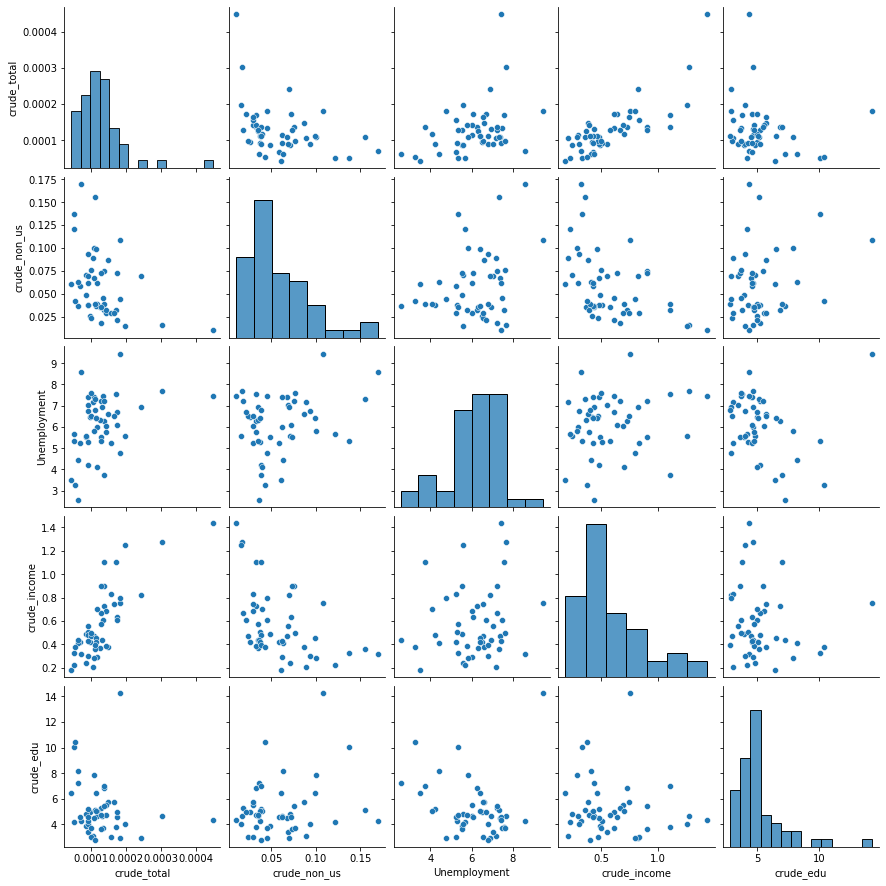

In [104]:
sns.pairplot(other_opioid_data_state[['crude_total', 'crude_non_us', 'Unemployment', 'crude_income', 'crude_edu']])

In [105]:
other_opioid_data['crude_bach']=other_opioid_data['Bachelor_Degree']/other_opioid_data['Population']
other_opioid_data['crude_grad']=other_opioid_data['Grad_Degree']/other_opioid_data['Population']
other_opioid_data['crude_hs']=other_opioid_data['HS_Grad']/other_opioid_data['Population']
other_opioid_data['crude_lesshs']=other_opioid_data['Less_Than_HS']/other_opioid_data['Population']
other_opioid_data['crude_assoc']=other_opioid_data['Associates_Degree']/other_opioid_data['Population']

In [106]:
other_opioid_data2_state=other_opioid_data.groupby(
    ["State"]).agg(
    {'crude_total':'mean',
     'crude_bach':'mean',
     'crude_grad':'mean',
     'crude_hs':'mean',
     'crude_lesshs':'mean',
     'crude_assoc':'mean',
     'crude_edu':'mean'}
). reset_index()

In [107]:
other_opioid_data2_state.corr()

,crude_total,crude_bach,crude_grad,crude_hs,crude_lesshs,crude_assoc,crude_edu
crude_total,1.000000,-0.549405,-0.229657,0.571651,0.430176,-0.117609,-0.154957
crude_bach,-0.549405,1.000000,0.769381,-0.493127,-0.676969,-0.213229,0.293157
crude_grad,-0.229657,0.769381,1.000000,-0.242145,-0.341213,-0.433299,0.158106
crude_hs,0.571651,-0.493127,-0.242145,1.000000,0.403687,-0.279826,-0.000463
crude_lesshs,0.430176,-0.676969,-0.341213,0.403687,1.000000,-0.263243,-0.204132
crude_assoc,-0.117609,-0.213229,-0.433299,-0.279826,-0.263243,1.000000,0.006719
crude_edu,-0.154957,0.293157,0.158106,-0.000463,-0.204132,0.006719,1.000000


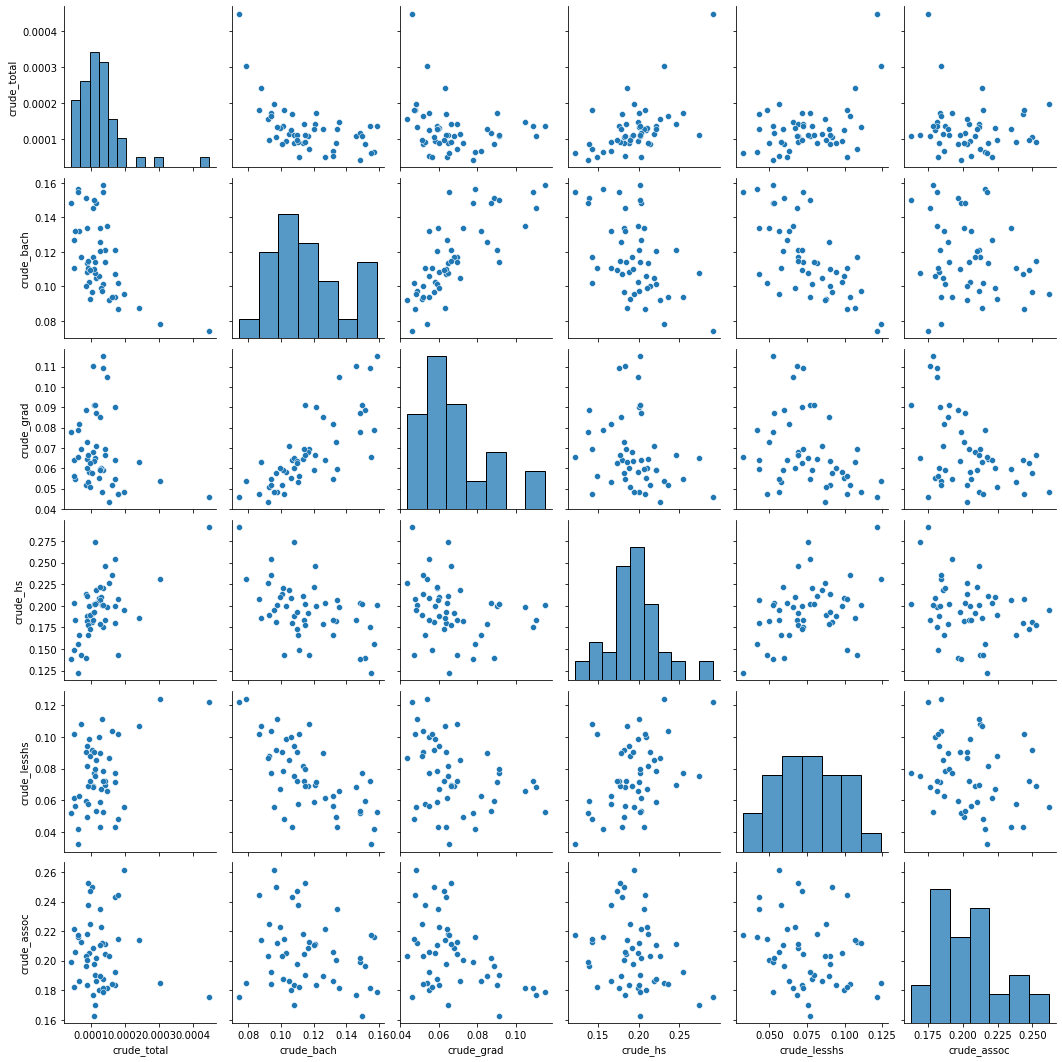

In [108]:
sns.pairplot(other_opioid_data2_state[['crude_total', 'crude_bach', 'crude_grad', 'crude_hs', 'crude_lesshs', 'crude_assoc']])

There is positive correlation of crude rate with rates of people with only high school and less than high school education. There is a negative correlation of crude death rate with rates of higher level education and with educational GDP. Lower rates of overdose death are shown among more educated people. In the States with higher educational GDP, there is lower crude rate of overdose death.

In [109]:
other_data_by_year=other_opioid_data.groupby('Year').agg({'Total':'sum', 'Heroin':'sum', 'Other':'sum', 'Methadone':'sum', 'Population':'mean'}).reset_index()
other_data_by_year

,Year,Total,Heroin,Other,Methadone,Population
0,2011,15214.0,3026.0,8431.0,2074.0,320046.468750
1,2012,15478.0,4267.0,7746.0,1720.0,322892.236979
2,2013,17352.0,6293.0,7833.0,1596.0,325562.845052
3,2014,20083.0,8475.0,8596.0,1422.0,328835.971354
4,2015,22636.0,10482.0,9218.0,1496.0,331904.628906
5,2016,26806.0,12943.0,11042.0,1566.0,334587.322497
6,2017,26316.0,12720.0,10909.0,1526.0,337047.285156


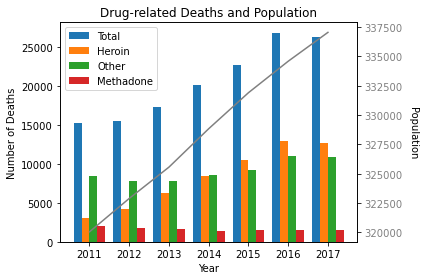

In [110]:
fig, ax = plt.subplots()

ax.bar(other_data_by_year['Year'] - 0.3, other_data_by_year['Total'], width=0.2, align='center', label='Total')
ax.bar(other_data_by_year['Year'] - 0.1, other_data_by_year['Heroin'], width=0.2, align='center', label='Heroin')
ax.bar(other_data_by_year['Year'] + 0.1, other_data_by_year['Other'], width=0.2, align='center', label='Other')
ax.bar(other_data_by_year['Year'] + 0.3, other_data_by_year['Methadone'], width=0.2, align='center', label='Methadone')

ax2 = ax.twinx()
ax2.plot(other_data_by_year['Year'], other_data_by_year['Population'], label='Population', color='gray')
ax2.set_ylabel('Population', rotation=270, labelpad=15)
ax2.tick_params(axis='y', labelcolor='gray')

ax.set_title('Drug-related Deaths and Population')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Deaths')

ax.legend()

fig.tight_layout()

plt.show()



In [111]:
#Downloading data on treatment programs from SAMHSA website https://dpt2.samhsa.gov/treatment/
treat=pd.read_excel('../final_proposal_data/TreatmentProgram.xlsx')

In [112]:
treat[treat['State Abbreviation']=='WV']

,Program Name,DBA,Street,City,County,State Abbreviation
2004,"BayMark Health Services of West Virginia, Inc",MedMark Treatment Centers Morgantown,53 Don Knotts Blvd,Morgantown,Monongalia,WV
2005,"Beckley Treatment Center, LLC",Beckley Treatment Center,175 Philpott Ln.,Beaver,Raleigh,WV
2006,"Charleston Treatment Center, LLC",Charleston Treatment Center,2157 Greenbrier St.,Charleston,Kanawha,WV
2007,"Clarksburg Treatment Center, LLC",Clarksburg Treatment Center,706 Oakmound Road,Clarksburg,Harrison,WV
2008,"Huntington Treatment Center, LLC",Huntington Treatment Center,135 4th Ave.,Huntington,Cabell,WV
2009,Martinsburg Institute,NaN,223 Eagle School Road,Martinsburg,Berkeley,WV
2010,"Parkersburg Treatment Center, LLC",Parkersburg Treatment Center,184 Holiday Hills Dr.,Parkersburg,Wood,WV
2011,"Wheeling Treatment Center, LLC",Wheeling Treatment Center,40 Orrs Lane,Triadelphia,Ohio,WV
2012,"Williamson Treatment Center, LLC",Williamson Treatment Center,1609 West 3rd Avenue,Williamson,Mingo,WV


In [113]:
treat.shape

(2013, 6)

Of 2013 services available in the country, only nine are availble in West Virginia. 

By year, between 2011 and 2017, the total death numbers and heroin related death numbers grew while death from other drugs and methadone either decreased or increased not significantly.

In [114]:
# Taking data from previous dataframe but only for 2019.
cdc_data_2019=cdc_data[[
    'State', 'State Abbreviation', 
    '2019 Age-adjusted Rate (per 100,000 population)', 
    '2019 Number of Deaths', 
    'Population'
]]

In [115]:
#Groupby treatment data by State
treat_groupby=treat.groupby(
    'State Abbreviation').agg({
    'Program Name':'count'}).sort_values('Program Name', ascending=False)

In [116]:
#Merging the two dataframes to see the count of programs that were implemented in each state. 
treat_ood=cdc_data_2019.merge(
    treat_groupby, on='State Abbreviation', 
    how='left').sort_values('2019 Number of Deaths', ascending=False)

treat_ood.head()

,State,State Abbreviation,"2019 Age-adjusted Rate (per 100,000 population)",2019 Number of Deaths,Population,Program Name
4,California,CA,15.0,6198,39144818,169.0
9,Florida,FL,25.5,5268,20271272,110.0
38,Pennsylvania,PA,35.6,4377,12802503,103.0
35,Ohio,OH,38.3,4251,11614373,118.0
32,New York,NY,18.2,3617,19795791,139.0


This data from SAMHSA shows that WV has 9 service points for 1.8 million population and 870 death. 

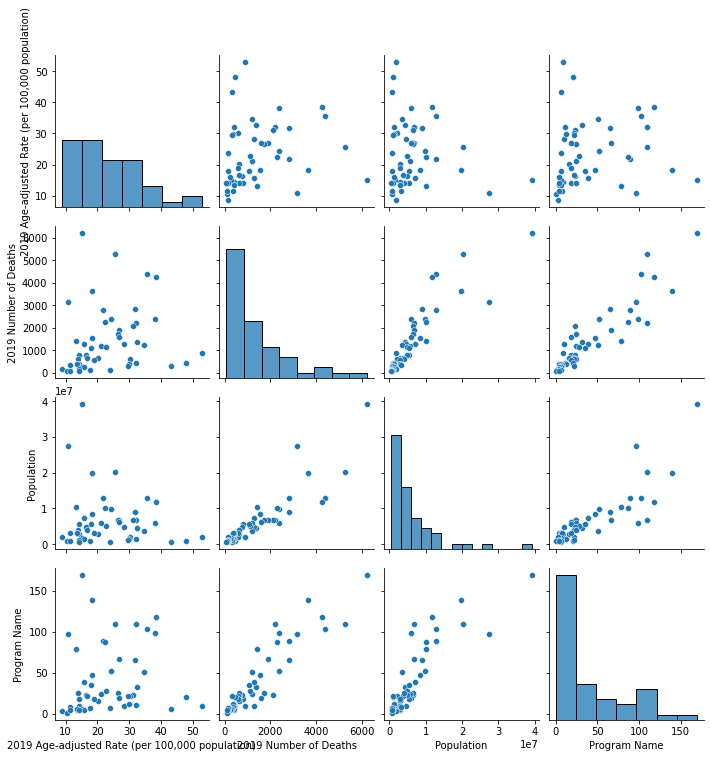

In [117]:
sns.pairplot(
    treat_ood[['2019 Age-adjusted Rate (per 100,000 population)', 
               '2019 Number of Deaths', 'Population', 'Program Name']])

In [118]:
#Calculating service coverage per 100,000 population, then changed the calculations to services per 1000 deaths. 
treat_ood['service_coef']=(treat_ood['Program Name']/treat_ood['2019 Number of Deaths'])*1000

In [119]:
treat_ood_6ychange=treat_ood.merge(
    cdc_data_rates, on=['State', '2019 Age-adjusted Rate (per 100,000 population)'], how='left').sort_values('service_coef', ascending=False)

treat_ood_6ychange=treat_ood_6ychange[[
    'State', 
    '2019 Age-adjusted Rate (per 100,000 population)',
    '2019 Number of Deaths', 
    'Population',
    'Program Name',
    'rate_change_6y',
    'service_coef'
]]

treat_ood_6ychange

,State,"2019 Age-adjusted Rate (per 100,000 population)",2019 Number of Deaths,Population,Program Name,rate_change_6y,service_coef
41,Rhode Island,29.5,307,1056298,22.0,7.1,71.661238
17,Georgia,13.1,1408,10214860,79.0,2.3,56.107955
47,Alaska,17.8,132,738432,7.0,3.4,53.030303
46,Vermont,23.8,133,626042,7.0,8.7,52.631579
11,Massachusetts,32.1,2210,6794422,110.0,16.1,49.773756
49,North Dakota,11.4,82,756927,4.0,8.6,48.780488
33,Delaware,48.0,435,945934,21.0,29.3,48.275862
21,Connecticut,34.7,1214,3590886,51.0,18.7,42.009885
9,Maryland,38.2,2369,6006401,99.0,23.6,41.789785
30,Oregon,14.0,615,4028977,25.0,2.7,40.650407


In [120]:
treat_ood_6ychange.describe()

,"2019 Age-adjusted Rate (per 100,000 population)",2019 Number of Deaths,Population,Program Name,rate_change_6y,service_coef
count,51.000000,51.000000,5.100000e+01,50.000000,51.000000,50.000000
mean,23.139216,1384.901961,6.302348e+06,40.100000,8.268627,29.363979
std,10.184009,1407.558557,7.201114e+06,41.613013,7.638259,13.559195
min,8.700000,79.000000,5.861070e+05,1.000000,-3.900000,7.892660
25%,14.650000,379.500000,1.749529e+06,9.000000,2.450000,21.111326
50%,21.100000,870.000000,4.425092e+06,22.500000,7.600000,27.512517
75%,30.050000,1998.000000,6.999208e+06,61.750000,11.700000,36.329339
max,52.800000,6198.000000,3.914482e+07,169.000000,29.300000,71.661238


West Virginia is in the bottom quartile for service coverage but has the maximum age adjusted rate and with the upper quartile level of the rate increase. Rhode Island has the maximum service coefficient and Delaware is in the upper quartile. This maybe the reason these two States were able to go down in the list of the rate increases. 

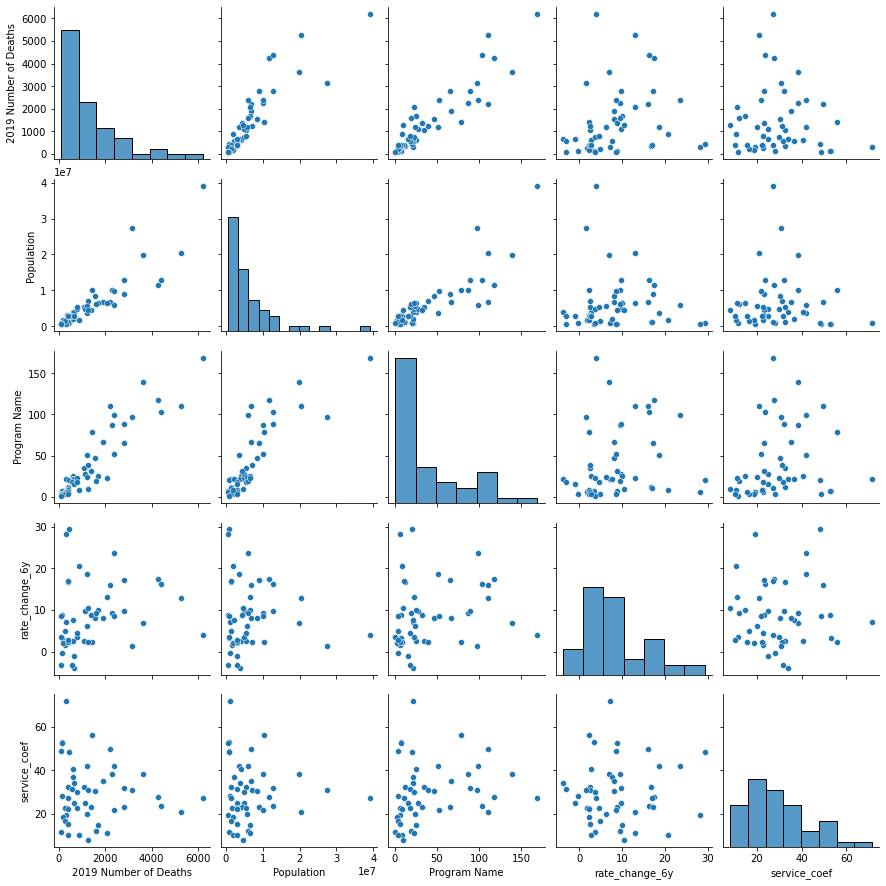

In [121]:
sns.pairplot(treat_ood_6ychange[['2019 Number of Deaths', 'Population','Program Name', 'rate_change_6y', 'service_coef']]);

In [122]:
treat_ood.corr()

,"2019 Age-adjusted Rate (per 100,000 population)",2019 Number of Deaths,Population,Program Name,service_coef
"2019 Age-adjusted Rate (per 100,000 population)",1.000000,0.186931,-0.109778,0.127836,0.028755
2019 Number of Deaths,0.186931,1.000000,0.889088,0.915570,-0.071190
Population,-0.109778,0.889088,1.000000,0.848922,-0.031431
Program Name,0.127836,0.915570,0.848922,1.000000,0.217068
service_coef,0.028755,-0.071190,-0.031431,0.217068,1.000000


This scatter plot has West Virginia as outlier with more than 52 age-adjusted rate and the services coefficient for service coverage at around .5

In [123]:
other_opioid_data.head()

,State,County,Year,Total,Heroin,Other,Methadone,Population,LandArea,Bike,...,crude_land,crude_non_us,crude_income,crude_gdp,crude_edu,crude_bach,crude_grad,crude_hs,crude_lesshs,crude_assoc
0,Alabama,Baldwin,2011,10.0,NaN,NaN,NaN,186717.0,1589.78,1.0,...,0.008514,0.027566,0.362956,26.868121,2.561508,0.122892,0.058500,0.194257,0.080839,0.210029
1,Alabama,Cullman,2011,NaN,NaN,NaN,NaN,80536.0,734.84,NaN,...,0.009124,0.019643,0.637901,28.544328,2.577853,0.059688,0.036505,0.222050,0.158786,0.202220
2,Alabama,Etowah,2011,NaN,NaN,NaN,NaN,104303.0,534.99,NaN,...,0.005129,0.017574,0.492124,26.860407,4.128002,0.063680,0.040938,0.219927,0.125250,0.233215
3,Alabama,Jefferson,2011,39.0,10.0,28.0,10.0,658931.0,1111.28,0.1,...,0.001686,0.031770,0.100783,59.969376,6.893034,0.119585,0.072870,0.184106,0.088237,0.199909
4,Alabama,Madison,2011,14.0,NaN,12.0,NaN,340111.0,801.59,0.3,...,0.002357,0.041645,0.224462,57.370097,3.339175,0.149872,0.088668,0.143850,0.070762,0.184649


In [124]:
#Merging two df to see the services that are available in WV. 
treat_ood_wv=other_opioid_data.merge(
    treat, on='County', how='left')[[
    'State', 'County', 'Total',
    'Population', 
    'Program Name'
]].sort_values('Total', ascending=False)

In [125]:
treat_ood_wv=treat_ood_wv[treat_ood_wv['State']=='West Virginia']

In [126]:
#Four out of nine service are available in hte counties that have the highest number of deaths. 
treat_ood_wv.groupby('County').agg({'Total':'sum', 'Program Name':'max'}).sort_values('Total', ascending=False)

,Total,Program Name
County,,
Kanawha,419.0,"Charleston Treatment Center, LLC"
Cabell,340.0,"Huntington Treatment Center, LLC"
Berkeley,289.0,Martinsburg Institute
Raleigh,273.0,"Beckley Treatment Center, LLC"
Mercer,212.0,NaN
Wayne,121.0,NaN
Wyoming,115.0,NaN
Mingo,112.0,"Williamson Treatment Center, LLC"
Logan,109.0,NaN


<h4> Mapping<h4>

In [127]:
import folium
import plotly.express as px
import geopandas as gpd

In [128]:
us_map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

In [129]:
import json
states = gpd.read_file('../final_proposal_data/us-states.json')


In [130]:
states.head()

,id,name,geometry
0,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984..."
1,AK,Alaska,"MULTIPOLYGON (((-131.60202 55.11798, -131.5691..."
2,AZ,Arizona,"POLYGON ((-109.04250 37.00026, -109.04798 31.3..."
3,AR,Arkansas,"POLYGON ((-94.47384 36.50186, -90.15254 36.496..."
4,CA,California,"POLYGON ((-123.23326 42.00619, -122.37885 42.0..."


In [131]:
states.rename(columns={'name':'State'}, inplace=True)

In [132]:
#merging the geolocation data with the overdose data
maps_merged = states.merge(treat_ood_6ychange, on='State')

In [133]:
#Removing Hawaii and Alaska from the map to include continental US only
maps_merged = maps_merged[(maps_merged['State']!='Alaska') & (maps_merged['State']!='Hawaii')]

In [134]:
maps_merged.head()

,id,State,geometry,"2019 Age-adjusted Rate (per 100,000 population)",2019 Number of Deaths,Population,Program Name,rate_change_6y,service_coef
0,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",16.3,768,4858979,23.0,3.6,29.947917
2,AZ,Arizona,"POLYGON ((-109.04250 37.00026, -109.04798 31.3...",26.8,1907,6828065,67.0,8.1,35.133718
3,AR,Arkansas,"POLYGON ((-94.47384 36.50186, -90.15254 36.496...",13.5,388,2978204,6.0,2.4,15.463918
4,CA,California,"POLYGON ((-123.23326 42.00619, -122.37885 42.0...",15.0,6198,39144818,169.0,3.9,27.266860
5,CO,Colorado,"POLYGON ((-107.91973 41.00391, -105.72895 40.9...",18.0,1079,5456574,35.0,2.5,32.437442


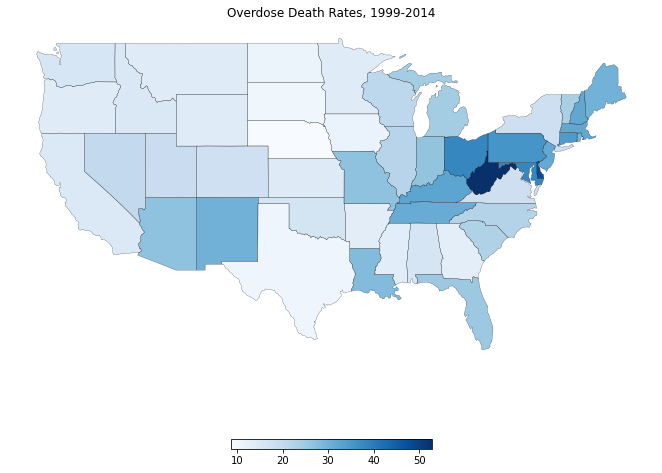

In [135]:
#Maps of the death crude rates using geopnadas

ax = maps_merged.boundary.plot(edgecolor='black', linewidth=0.2, figsize=(12,9))
maps_merged.plot(ax=ax, column='2019 Age-adjusted Rate (per 100,000 population)', cmap='Blues', legend=True, legend_kwds={'shrink':0.3, 'orientation': 'horizontal'})

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

for edge in ['right','bottom', 'left', 'top']:
    ax.spines[edge].set_visible(False)
    
ax.set_title('Overdose Death Rates, 1999-2014')

plt.show()

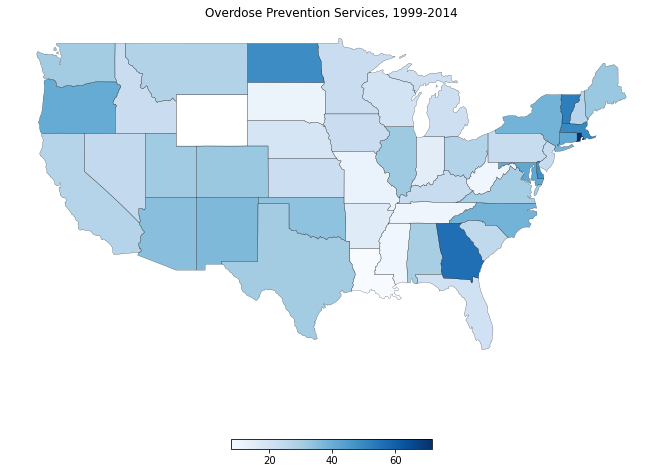

In [136]:
#Building the same map but with services coverage data
ax = maps_merged.boundary.plot(edgecolor='black', linewidth=0.2, figsize=(12,9))
maps_merged.plot(ax=ax, column='service_coef', cmap='Blues', legend=True, legend_kwds={'shrink':0.3, 'orientation': 'horizontal'})

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

for edge in ['right','bottom', 'left', 'top']:
    ax.spines[edge].set_visible(False)
    
ax.set_title('Overdose Prevention Services, 1999-2014')

plt.show()

In [137]:
ood_merged=states.merge(ood, on = 'State', how='left')
ood_merged.head()

,id,State,geometry,year,deaths,population,crude_rate,crate_low,crate_up,prescriptions
0,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",1999,39.0,4430141,0.880333,0.6,1.2,116
1,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",2000,46.0,4447100,1.034382,0.8,1.4,126
2,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",2001,67.0,4467634,1.499675,1.2,1.9,138
3,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",2002,75.0,4480089,1.674074,1.3,2.1,142
4,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",2003,54.0,4503491,1.199070,0.9,1.6,149


This interactive map shows that the epidemic started in the western States but started affecting the States in the East around 2010.

In [138]:
import plotly.express as px
import plotly.offline as pyo
from IPython.display import display

In [139]:
pyo.init_notebook_mode(connected=True)

In [140]:
fig = px.choropleth(ood_merged,
                    locationmode='USA-states',
                    locations='id',
                    color='crude_rate',
                    scope='usa',
                    animation_frame='year',
                    color_continuous_scale='blues')

In [141]:
display(fig)